# Laboratorio 2
### Entrega: martes 31 de agosto 2021, 23:59 horas


## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [1]:
%matplotlib widget
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*p = p\\
E[X^2] & = & 1*p + 0*p = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

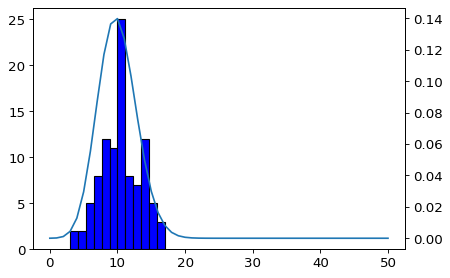

In [2]:
# Número de simulaciones
size = 100

# Número de ensayos
n = 50

# Probabilidad de éxito
p = 0.2

# Arreglo de resultados de cada simulación ( size simulaciones )
datos_bin = stats.binom.rvs(n=n, p=p, size=size) 

# Histograma distribución empírica
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/4))

# Probabilidad teórica
vec = list(range(n+1))

pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
    
# Gráfica distribución teórica
ax2 = ax.twinx()
ax2.plot(vec,pvec)
plt.draw()

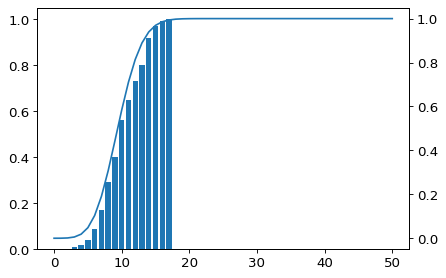

In [3]:
# Calcula la distribución empírica acumulada
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

x,cum_bin = ecdf(datos_bin)

# Gráfica distribución empírica acumulada
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.bar(x,cum_bin)

# Probabilidad teórica
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))

# Gráfica distribución teórica acumulada
ax2 = ax.twinx()
ax2.plot(vec,pvec)
plt.draw()

In [4]:
# Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 10.36  teórica:  10.0
varianza empírica: 8.750399999999997  teórica:  8.0
asimetría empírica: 0.010929731919018278 teórica:  0.21213203435596423
curtosis empírico:  -0.6166554680562775 teórico:  0.004999999999999977


In [14]:
# Calcula diferencia relativa de estádisticos
# teóricos vs empíricos con diversos números de simulacioens
def relDiffEstadisticos(n,p,precision):
    
    # Arreglo de número de simulaciones
    simulaciones = np.arange(2,10050,10)
    
    # Estadísticos teóricos
    med_teo = n*p
    var_teo = n*p*(1-p)
    asi_teo = (1-2*p)/(math.sqrt(n*p*(1-p)))
    cur_teo = (1-6*p*(1-p))/(n*p*(1-p))
    
    # Almacena estádisticos empíticos de cada iteración
    med_emp = np.zeros(simulaciones.size)
    var_emp = np.zeros(simulaciones.size)
    asi_emp = np.zeros(simulaciones.size)
    cur_emp = np.zeros(simulaciones.size)
    
    for i in range(simulaciones.size):
        
        # Arreglo de resultados de cada simulación ( size simulaciones )
        datos_bin = stats.binom.rvs(n=n, p=p, size=simulaciones[i]) 
        
        ## Cálculo de esperanza y varianza empírica y teórica
        med_emp[i] = np.sum(datos_bin)/simulaciones[i]
        var_emp[i] = sum((datos_bin - med_emp[i])*(datos_bin-med_emp[i]))/simulaciones[i]
        asi_emp[i] = stats.skew(datos_bin)
        cur_emp[i] = stats.kurtosis(datos_bin)
    
    # Diferencia relativa
    med_diff = abs((med_teo - med_emp)/med_teo)
    var_diff = abs((var_teo - var_emp)/var_teo)
    asi_diff = abs((asi_teo - asi_emp)/asi_teo)
    cur_diff = abs((cur_teo - cur_emp)/cur_teo)
    
    # Límite de error
    l1 = np.argwhere(med_diff>precision)
    l2 = np.argwhere(var_diff>precision)
    l3 = np.argwhere(asi_diff>precision)
    l4 = np.argwhere(cur_diff>precision)
    
    if l1.size != 0:
        med_lim = simulaciones[l1[-1]]
    else:
        med_lim = 0
        
    if l2.size != 0:
        var_lim = simulaciones[l2[-1]]
    else:
        var_lim = 0
        
    if l3.size != 0:
        asi_lim = simulaciones[l3[-1]]
    else:
        asi_lim = 0
        
    if l4.size != 0:
        cur_lim = simulaciones[l4[-1]]
    else:
        cur_lim = 0
        
    # Gráfica distribución empírica acumulada
    fig, ax = plt.subplots(2, 2,figsize=(14, 9), dpi=80)
    
    ax[0][0].set_title("Diff Rel Media")
    ax[0][1].set_title("Diff Rel Varianza")
    ax[1][0].set_title("Diff Rel Asimetría")
    ax[1][1].set_title("Diff Rel Curtosis")
    
    ax[0][0].plot(simulaciones,med_diff)
    ax[0][1].plot(simulaciones,var_diff)
    ax[1][0].plot(simulaciones,asi_diff)
    ax[1][1].plot(simulaciones,cur_diff)
    
    ax[0][0].axvline(x=med_lim, color="red")
    ax[0][0].text(med_lim,max(med_diff)/2," " + str(med_lim), color="red")
    ax[0][1].axvline(x=var_lim, color="red")
    ax[0][1].text(var_lim,max(var_diff)/2," " + str(var_lim), color="red")
    ax[1][0].axvline(x=asi_lim, color="red")
    ax[1][0].text(asi_lim,max(asi_diff)/2," " + str(asi_lim), color="red")
    ax[1][1].axvline(x=cur_lim, color="red")
    ax[1][1].text(cur_lim,max(cur_diff)/2," " + str(cur_lim), color="red")

#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

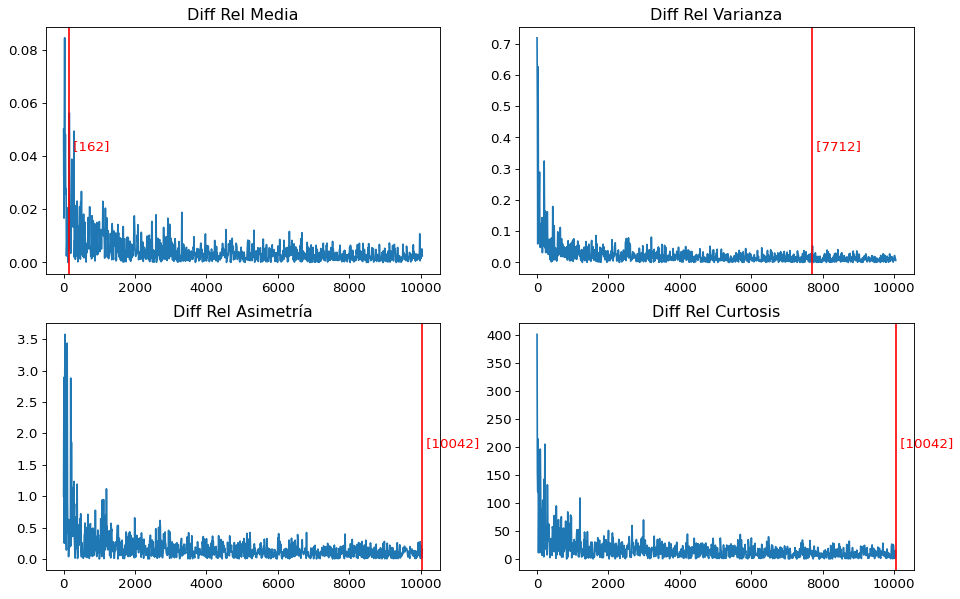

In [15]:
relDiffEstadisticos(n=50,p=0.2,precision=0.05)

Con los parámetros actuales podemos observar que a partir de aproximadamente 1000 simulaciones la diferencia relativa entre los estadísticos empíricos y teoricos se mantiene constante.
Si fijamos un margen de diferencia relativa procentual de 5%, podemos ver que la media requiere de aproximadamente 100 simulaciones y la varianza sobre 5000.
Para la asimetría y curtosis, vemos que sobre 10000 simulaciones aún existen casos con diferencia relativa mayor a 5%.

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

Utilizando la misma función anterior podemos ver que si aumentamos el número de ensayos (N), se necesitan menos simulaciones para que el error relativo de la media sea pequeño, sin embargo ocurre lo contrario para los demás estadísticos.


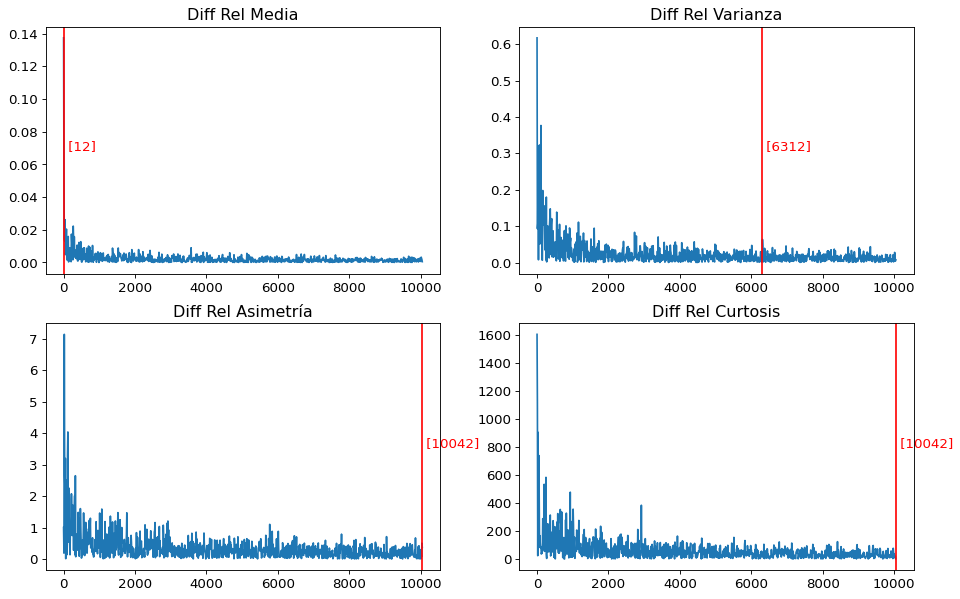

In [20]:
relDiffEstadisticos(n=200,p=0.2,precision=0.05)

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

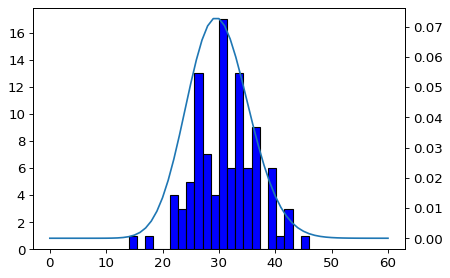

In [236]:
# Número de simulaciones
size = 100

# Tasa ( parámetro de la distribución de poisson )
lamd = 30

# Arreglo de resultados de cada simulación ( size simulaciones )
datos_bin = stats.poisson.rvs(mu=lamd, size=size) 

# Histograma distribución empírica
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = len(np.unique(datos_bin)))

# Probabilidad teórica
vec = list(range(lamd*2+1))

pvec = []
for i in vec:
    pvec.append(stats.poisson.pmf(i,lamd))
    
# Gráfica distribución teórica
ax2 = ax.twinx()
ax2.plot(vec,pvec)
plt.draw()

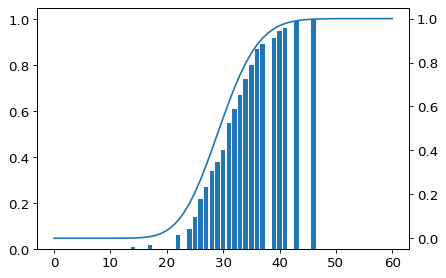

In [238]:
# Calcula la distribución empírica acumulada
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

x,cum_bin = ecdf(datos_bin)

# Gráfica distribución empírica acumulada
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.bar(x,cum_bin)

# Probabilidad teórica
pvec = []
for i in vec:
    pvec.append(stats.poisson.cdf(i, lamd))

# Gráfica distribución teórica acumulada
ax2 = ax.twinx()
ax2.plot(vec,pvec)
plt.draw()

#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

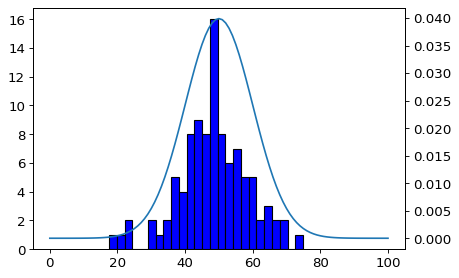

In [243]:
# Número de simulaciones
size = 100

# Media
mu = 50

# Varianza
sigma = 10

# Arreglo con resultados de cada simulación
datos_norm = stats.norm.rvs(loc=mu, scale=sigma, size=size) 

# Histograma distribución empírica
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/4))

# Distribución teórica
vec = list(range(2*mu+1))
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))

# Gráfica distribución teórica
ax2 = ax.twinx()
ax2.plot(vec,pvec)
plt.draw()

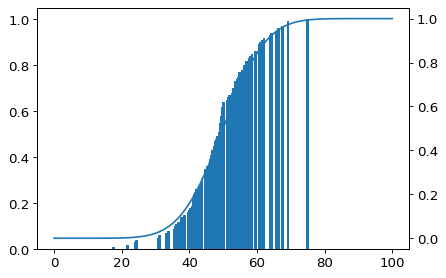

In [246]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [247]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


esperanza empírica: 48.37501985337471  teórica:  50
varianza empírica: 107.37659760782505  teórica:  100
asimetría empírica: -0.23950351064332012 teórica:  0
curtosis empírico:  0.5617499151274585 teórico:  0


In [11]:
# Calcula diferencia absoluta de estádisticos
# teóricos vs empíricos con diversos números de simulacioens
def absDiffEstadisticosNorm(mu,sigma):
    
    # Arreglo de número de simulaciones
    simulaciones = np.arange(5,50000,100)
    
    # Estadísticos teóricos
    med_teo = mu
    var_teo = sigma*sigma
    asi_teo = 0
    cur_teo = 0
    
    # Almacena estádisticos empíticos de cada iteración
    med_emp = np.zeros(simulaciones.size)
    var_emp = np.zeros(simulaciones.size)
    asi_emp = np.zeros(simulaciones.size)
    cur_emp = np.zeros(simulaciones.size)
    
    for i in range(simulaciones.size):
        
        # Arreglo de resultados de cada simulación ( size simulaciones )
        datos_bin = stats.norm.rvs(loc=mu, scale=sigma, size=simulaciones[i]) 
        
        ## Cálculo de esperanza y varianza empírica y teórica
        med_emp[i] = np.sum(datos_bin)/simulaciones[i]
        var_emp[i] = sum((datos_bin - med_emp[i])*(datos_bin-med_emp[i]))/simulaciones[i]
        asi_emp[i] = stats.skew(datos_bin)
        cur_emp[i] = stats.kurtosis(datos_bin)
    
    # Diferencia absoluta
    med_diff = abs(med_teo - med_emp)
    var_diff = abs(var_teo - var_emp)
    asi_diff = abs(asi_teo - asi_emp)
    cur_diff = abs(cur_teo - cur_emp)
        
    # Gráfica distribución empírica acumulada
    fig, ax = plt.subplots(2, 2,figsize=(14, 9), dpi=80)
    
    ax[0][0].set_yscale('log')
    ax[0][1].set_yscale('log')
    ax[1][0].set_yscale('log')
    ax[1][1].set_yscale('log')
    ax[0][0].set_title("Diff Abs Media")
    ax[0][1].set_title("Diff Abs Varianza")
    ax[1][0].set_title("Diff Abs Asimetría")
    ax[1][1].set_title("Diff Abs Curtosis")
    
    ax[0][0].plot(simulaciones,med_diff)
    ax[0][1].plot(simulaciones,var_diff)
    ax[1][0].plot(simulaciones,asi_diff)
    ax[1][1].plot(simulaciones,cur_diff)


#### Ejercicio 3: 

1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

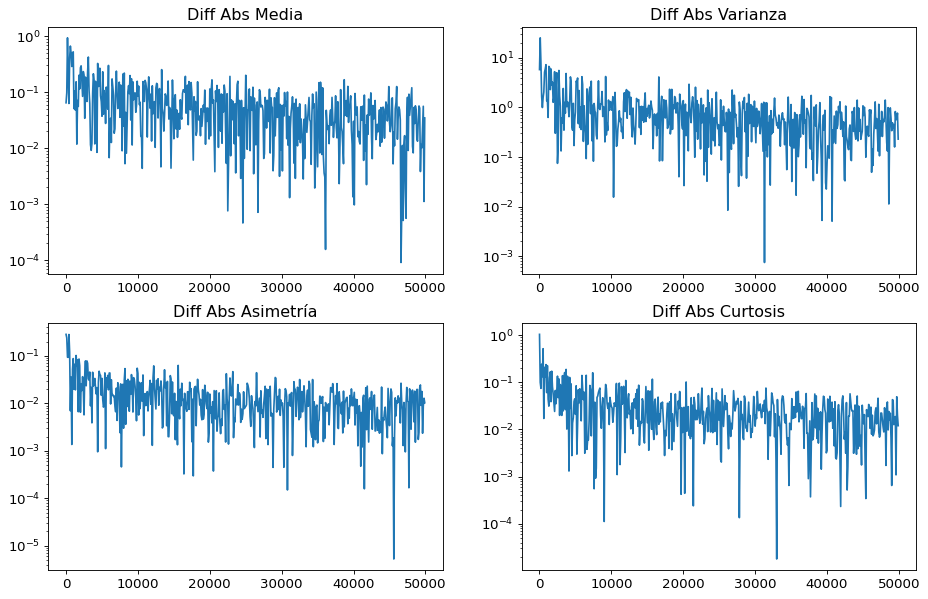

In [25]:
absDiffEstadisticosNorm(50,10)

Podemos ver que a partir de aproximadamente 20000 simulaciones la diferencia absoluta entre la media empírica y teorica es menor o igual a 0.1.
En el caso de la varianza, con aproximadamente 50000 simulaciones se alcanza una diferencia absoluta de 1.
Tanto en la asimetría como curtosis la diferencia siempre es pequeña ( porque la teórica es 0 ), y a partir de las 10000 simulaciones parece dejar de dismuir bruscamente. 

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

Para valores bajos del parámetro "media", podemos notar que la diferencia absoluta entre la media empírica y teórica disminuye de forma más abrupta, pero no vemos un cambio significativo en los demás estadísticos.
En cambio si aumentamos el parámetro varianza, vemos que se requiere de significativamente menos simulaciones para disminuir la diferencia absoluta de la asimetría y curtosis empíricas respecto a las teoricas.
Para la media y varianza en cambio, aumenta el número de simulaciones requeridas. 

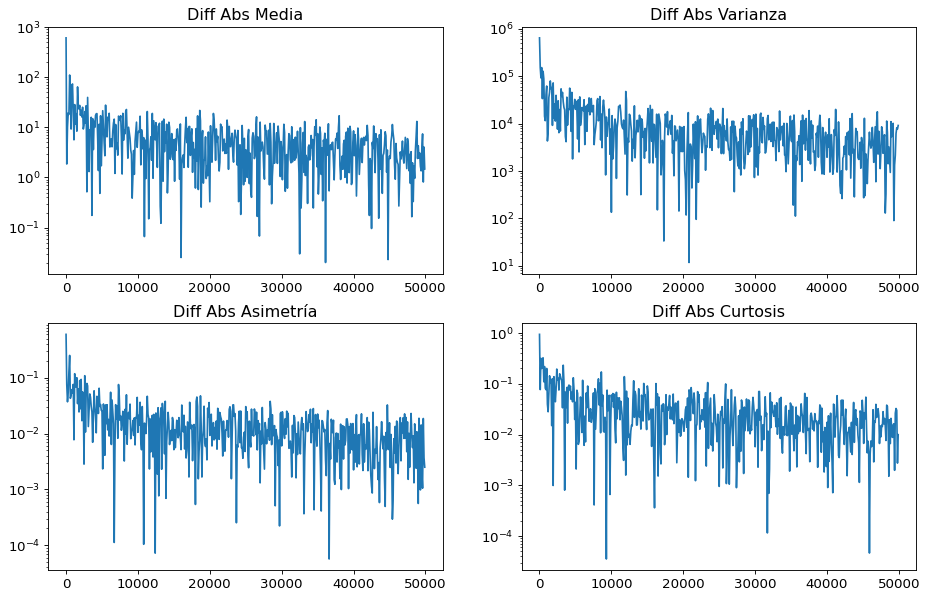

In [27]:
absDiffEstadisticosNorm(1,1000)

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída chi-cuadrado de $k$ grados de libertad

#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb
